In [1]:
#OK Lets try importing ROOT, and uproot
import ROOT
#ROOT.gROOT.Reset()
import uproot

Welcome to JupyROOT 6.14/04


In [2]:
#we know the files are located here: /project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/
#Lets take a look inside of that directory:
import os
dir = "/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/"
os.system("ls {}".format(dir))

0

mc16a
mc16d
mc16e


In [3]:
#There are files stored for mc16a, mc16d, and mc16e. mc16a is the simulation for 2015 + 2016 data, mc16d is the simulation
#for 2017 data and mc16e is the simulation for 2018 data. Lets take a look at the files present:

In [4]:
dir_mc16a = os.path.join(dir, "mc16a")
os.system("ls {}".format(dir_mc16a))

0

Nominal
Systematics


In [5]:
#Don't worry about systematics, lets just focus on Nominal simulation 
dir_mc16a = os.path.join(dir, "mc16a", "Nominal")
os.system("ls {}".format(dir_mc16a))

0

mc16_13TeV.344973.aMcAtNloPythia8EvtGen_A14NNPDF23LO_bbH125_yb2_ZZ4lep_noTau.root
mc16_13TeV.344974.aMcAtNloPythia8EvtGen_A14NNPDF23LO_bbH125_ybyt_ZZ4lep_noTau.root
mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root
mc16_13TeV.345066.PowhegPythia8EvtGen_NNPDF3_AZNLO_ggZH125_ZZ4lepZinc.root
mc16_13TeV.345576.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH123_ZZ4l.root
mc16_13TeV.345577.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH124_ZZ4l.root
mc16_13TeV.345578.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH126_ZZ4l.root
mc16_13TeV.345579.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH127_ZZ4l.root
mc16_13TeV.345708.Sherpa_222_NNPDF30NNLO_ggllllNoHiggs_0M4l130.root
mc16_13TeV.345709.Sherpa_222_NNPDF30NNLO_ggllllNoHiggs_130M4l.root
mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root
mc16_13TeV.346340.PowhegPy8EG_A14NNPDF23_NNPDF30ME_ttH125_ZZ4l_allhad.root
mc16_13TeV.346341.PowhegPy8EG_A14NNPDF23_NNPDF30ME_ttH125_ZZ4l_semilep.root
mc16_13TeV.346342.PowhegPy8EG_A14NNPDF23_NNPDF3

In [6]:
#We can see a large set of simulated samples. Lets take a ggH/VBF 125 GeV Sample as signal, and a qqZZ sample as background
signal_files = ["mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root", \
                "mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root"]
background_files = ["mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root",\
                    "mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_150.root",\
                    "mc16_13TeV.364252.Sherpa_222_NNPDF30NNLO_llll_m4l300.root"]
location = "/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/__CAMPAIGN__/Nominal/"
full_signal_files = []
for s in signal_files:
    for campaign in ["mc16a", "mc16d", "mc16e"]:
        full_signal_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), s))
full_bkg_files = []
for b in background_files:
    for campaign in ["mc16a", "mc16d", "mc16e"]:
        full_bkg_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), b))
        

In [7]:
full_bkg_files

['/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16e/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_150.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_

In [8]:
full_signal_files

['/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16e/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_

In [9]:
#Lets take a look at the contents of one of the signal files:
f = uproot.open(full_signal_files[0])

In [10]:
f.keys()
#we can see that there a few trees and a histogram inside of the file. Don't worry if there seems to be two trees,
#reading only one should be good enough

[b'tree_incl_all;9', b'tree_incl_all;8', b'CountingHist;1', b'MetaData;1']

In [11]:
t = f["tree_incl_all"]

In [12]:
t.keys()
#This prints all of the variables stored inside of the tree

[b'bcid',
 b'cand_index',
 b'changedQuadForME',
 b'event_type',
 b'fsr_associated_lepton',
 b'fsr_type',
 b'hasExtraLepNominal',
 b'lbn',
 b'n_extraLep',
 b'n_jets',
 b'npv',
 b'prod_type',
 b'prod_type_SB',
 b'prod_type_fine',
 b'random_run',
 b'run',
 b'truth_decay',
 b'truth_event_type',
 b'truth_pairing',
 b'event',
 b'BDT_Massdiscriminant',
 b'BDT_discriminant',
 b'KD_discriminant',
 b'ave_int_per_xing',
 b'eta4l_fsr',
 b'eta4l_truth_born',
 b'eta4l_truth_matched_bare',
 b'eta4l_unconstrained',
 b'fsr_dr',
 b'fsr_eta',
 b'fsr_f1',
 b'fsr_phi',
 b'fsr_pt',
 b'fsr_pt_constrained',
 b'm4l_constrained',
 b'm4l_constrained_HM',
 b'm4l_fsr',
 b'm4l_truth_born',
 b'm4l_truth_matched_bare',
 b'm4l_unconstrained',
 b'm4lerr_constrained',
 b'm4lerr_fsr',
 b'm4lerr_unconstrained',
 b'mZ1_constrained',
 b'mZ1_fsr',
 b'mZ1_truth_born',
 b'mZ1_truth_matched_bare',
 b'mZ1_unconstrained',
 b'mZ2_constrained',
 b'mZ2_fsr',
 b'mZ2_truth_born',
 b'mZ2_truth_matched_bare',
 b'mZ2_unconstrained',
 b'm

In [13]:
#Lets try to make an invariant mass plot:
dataframe = t.pandas.df(["m4l_constrained", "weight", "m4lerr_constrained"])

In [14]:
arrays = t.arrays(["m4l_constrained", "weight", "m4lerr_constrained"])

In [15]:
arrays

{b'm4l_constrained': array([121.05567, 124.53856, 128.15407, ..., 126.92762, 123.69727,
         96.59607], dtype=float32),
 b'weight': array([0.00013737, 0.0001222 , 0.00010678, ..., 0.00011142, 0.00013013,
        0.00017581]),
 b'm4lerr_constrained': array([1.2793553, 1.2732085, 2.4      , ..., 1.959439 , 1.2212908,
        1.2068623], dtype=float32)}

In [16]:
dataframe
#we can print the contents of the dataframe

m4l_constrained    weight  m4lerr_constrained
entry                                                
0            121.055672  0.000137            1.279355
1            124.538559  0.000122            1.273208
2            128.154068  0.000107            2.400000
3            125.442368  0.000112            1.627248
4            124.345390  0.000174            1.231672
5            126.476189  0.000178            1.211214
6            124.606735  0.000124            1.549351
7            123.203606  0.000120            1.124647
8            118.603485  0.000197            2.349211
9            124.931931  0.000142            1.544392
10           124.591026  0.000097            1.570532
11           128.778885  0.000159            3.486765
12           125.291611  0.000222            1.197451
13           126.394852  0.000164            1.057946
14           129.062469  0.000162            1.674840
15           124.337875  0.000075            1.612616
16           119.018456  0.000180            1.950154
17           124.400719  0.000161            0.945694
18           122.757286  0.000100            1.744821
19           127.518013  0.000115            2.005169
20           125.864365  0.000126            1.829100
21           130.396286  0.000123            1.614616
22           124.168365  0.000131            1.807990
23           124.584312  0.000126            1.137664
24           124.641167  0.000144            1.033141
25           128.454819  0.000103            2.019461
26           124.232246  0.000165            1.729884
27           124.743088  0.000100            1.984777
28           121.482491  0.000154            1.500753
29           107.383110  0.000161            1.803774
...                 ...       ...                 ...
399896       122.853851  0.000121            1.895467
399897       123.468803  0.000162            0.948111
399898       124.140160  0.000163            2.966814
399899       116.372765  0.000163            1.706311
399900       118.117165  0.000167            3.631371
399901       125.542030  0.000090            2.069343
399902       122.431122  0.000145            1.981612
399903       122.432045  0.000128            1.752004
399904       125.408646  0.000189            1.136272
399905       124.116440  0.000139            1.210140
399906       124.177528  0.000070            1.453044
399907       122.454613  0.000095            1.678314
399908       122.433815  0.000085            2.441771
399909       126.671616  0.000125            2.230207
399910       128.813080  0.000195            2.501952
399911       127.040184  0.000149            2.167022
399912       123.697670  0.000135            1.380443
399913       127.102066  0.000157            2.346389
399914       124.962715  0.000121            0.978390
399915       123.640625  0.000080            3.054924
399916       124.124817  0.000093            3.695874
399917       125.522339  0.000151            1.435976
399918       124.438438  0.000079            2.047844
399919       122.736954  0.000089            1.652438
399920       125.013695  0.000110            1.151769
399921       123.309181  0.000140            0.933262
399922       124.754616  0.000091            1.281833
399923       126.927620  0.000111            1.959439
399924       123.697273  0.000130            1.221291
399925        96.596069  0.000176            1.206862

[399926 rows x 3 columns]


Applying ATLAS style settings...



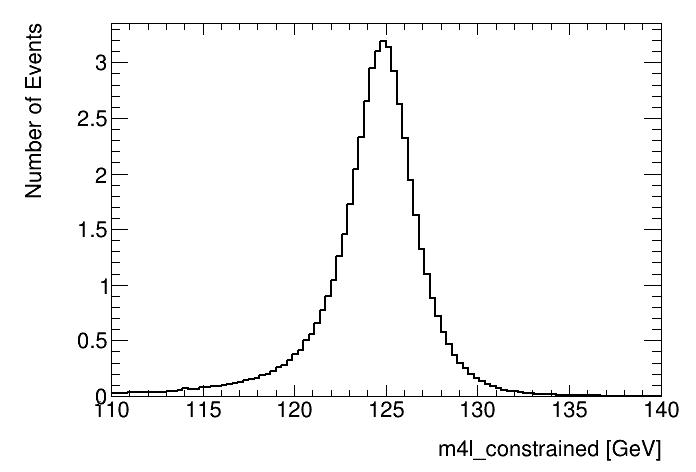

In [17]:
#Lets make the m4l plot
import root_numpy
from atlasplots import atlas_style as astyle
astyle.SetAtlasStyle()
hist = ROOT.TH1D("hist", "hist", 100, 110.0, 140.0)
root_numpy.fill_hist(hist, dataframe["m4l_constrained"].values, dataframe["weight"].values)
c1 = ROOT.TCanvas("","")
hist.Draw("HIST")
hist.GetXaxis().SetTitle("m4l_constrained [GeV]")
hist.GetYaxis().SetTitle("Number of Events")
c1.Draw()

In [18]:
#Lets have more fun, and try to make a correlation plot
import matplotlib.pyplot as plt
import numpy as np
cmap=plt.get_cmap('Reds')
binsx = np.linspace(120.0, 130.0, 100)
binsy = np.linspace(0.5, 3.0, 20)
#lets reweight everything to unity in bins of m4lerr on the y-axis
weights = dataframe["weight"].values
for blow, bhigh in zip(binsy[:-1], binsy[0:]):
    selection = (dataframe["m4lerr_constrained"].values > blow) & (dataframe["m4lerr_constrained"].values < bhigh)
    weights[selection] = weights[selection]/np.sum(weights[selection])

plt.hist2d(dataframe["m4l_constrained"].values, dataframe["m4lerr_constrained"].values, weights=weights, bins=(binsx,binsy), cmap=cmap)
bar = plt.colorbar()
plt.xlabel("m4l_constrained [GeV]")
plt.ylabel("m4lerr_constrained [GeV]")
bar.set_label("Number of Events")

In [19]:
#Lets make a signal and background plot:
signal_dataframe = []
variables = ["m4l_constrained", "weight"]
for sf in full_signal_files:
    signal_dataframe.append(uproot.open(sf)["tree_incl_all"].pandas.df(variables))
import pandas as pd
signal_dataframe = pd.concat(signal_dataframe)

background_dataframe = []
variables = ["m4l_constrained", "weight"]
for bf in full_bkg_files:
    background_dataframe.append(uproot.open(bf)["tree_incl_all"].pandas.df(variables))
import pandas as pd
background_dataframe = pd.concat(background_dataframe)

In [20]:
signal_dataframe

m4l_constrained    weight
entry                            
0            121.055672  0.000137
1            124.538559  0.000122
2            128.154068  0.000107
3            125.442368  0.000112
4            124.345390  0.000174
5            126.476189  0.000178
6            124.606735  0.000124
7            123.203606  0.000120
8            118.603485  0.000197
9            124.931931  0.000142
10           124.591026  0.000097
11           128.778885  0.000159
12           125.291611  0.000222
13           126.394852  0.000164
14           129.062469  0.000162
15           124.337875  0.000075
16           119.018456  0.000180
17           124.400719  0.000161
18           122.757286  0.000100
19           127.518013  0.000115
20           125.864365  0.000126
21           130.396286  0.000123
22           124.168365  0.000131
23           124.584312  0.000126
24           124.641167  0.000144
25           128.454819  0.000103
26           124.232246  0.000165
27           124.743088  0.000100
28           121.482491  0.000154
29           107.383110  0.000161
...                 ...       ...
675754       123.510429  0.000006
675755       124.375771  0.000011
675756       127.131714  0.000011
675757       125.701920  0.000004
675758       128.715988  0.000011
675759       125.412315  0.000016
675760       126.355797  0.000013
675761       121.472404  0.000011
675762       125.116508  0.000011
675763       125.445389  0.000010
675764       128.366318  0.000011
675765       123.253876  0.000013
675766       124.480324  0.000010
675767       126.408165  0.000014
675768       122.726334  0.000002
675769       124.372421  0.000012
675770       124.624992  0.000004
675771       135.477829  0.000007
675772       124.646744  0.000012
675773       124.186623  0.000000
675774       122.426239  0.000015
675775       128.869888  0.000011
675776       123.561897  0.000011
675777       120.649101  0.000012
675778       125.142944  0.000011
675779       124.202805  0.000011
675780       128.502548  0.000010
675781       125.595337  0.000012
675782       124.126381  0.000014
675783       122.303123  0.000013

[3459976 rows x 2 columns]

In [21]:
background_dataframe

m4l_constrained    weight
entry                            
0            203.993271  0.005134
1            118.516243 -0.005383
2             86.056602 -0.005918
3             91.812355  0.000630
4             85.406052  0.000843
5            236.481216  0.006676
6            116.832916  0.000000
7            242.317688  0.005037
8            226.954239  0.000700
9            227.865524  0.003189
10           270.719452  0.000950
11           204.262070  0.000559
12           180.109833  0.005072
13           123.984818  0.000000
14           515.733459  0.000000
15           332.932159  0.000000
16           226.219910 -0.004550
17           452.765289 -0.000000
18           250.688339  0.002650
19           208.732788  0.006427
20           372.756866  0.000000
21           312.807037  0.000000
22           133.607773  0.000000
23           186.363388  0.000505
24           197.836243  0.000719
25           438.224152  0.000000
26           184.231003  0.001791
27           287.572388  0.000693
28           297.377502  0.000000
29           247.225647  0.005814
...                 ...       ...
827849       498.916656  0.000145
827850       440.745667  0.000733
827851       414.241150  0.000723
827852       351.232056  0.000687
827853       478.350220  0.000522
827854       311.467346  0.000745
827855       315.005188  0.001694
827856       893.273193  0.000630
827857       333.138123 -0.000688
827858       329.026642  0.000822
827859       340.863098  0.000431
827860       330.659912  0.000721
827861       383.371368  0.000734
827862       356.620667  0.000692
827863       459.984955  0.000718
827864       315.773315  0.000233
827865       507.638000  0.000732
827866       536.542542  0.000087
827867       297.741547  0.000672
827868       368.880798 -0.001388
827869       308.221313  0.000713
827870       284.708466 -0.000251
827871       560.976318 -0.000116
827872       387.171326  0.000706
827873       672.535339  0.000520
827874       327.158569  0.000726
827875       314.208832  0.000668
827876       714.817871  0.000651
827877       398.680878  0.000697
827878       302.487732  0.000727

[6246512 rows x 2 columns]

In [22]:
signal_hist = ROOT.TH1D("sig_hist", "sig_hist", 100, 110.0, 160.0)
bkg_hist = ROOT.TH1D("bkg_hist", "bkg_hist", 100, 110.0, 160.0)
inv_mass_signal = signal_dataframe["m4l_constrained"].values
inv_mass_bkg = background_dataframe["m4l_constrained"].values
weight_signal = signal_dataframe["weight"].values
weight_bkg = background_dataframe["weight"].values
root_numpy.fill_hist(signal_hist, inv_mass_signal, weight_signal)
root_numpy.fill_hist(bkg_hist, inv_mass_bkg, weight_bkg)

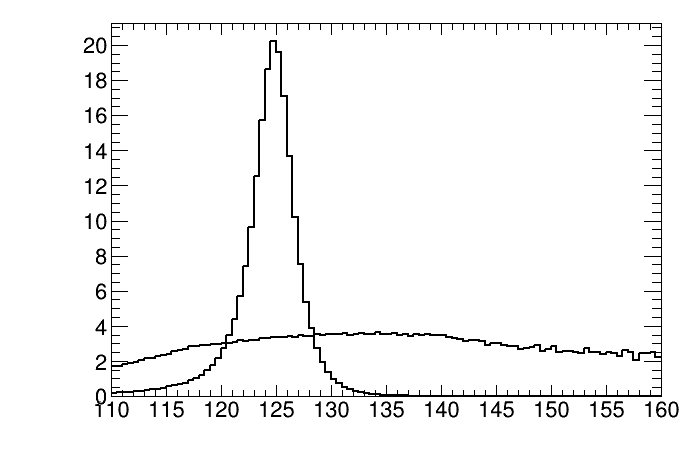

In [23]:
#plot the two histograms
c2 = ROOT.TCanvas("canv", "canv")
signal_hist.Draw("HIST")
bkg_hist.Draw("SAME HIST")
c2.Draw()

In [24]:
#Lets try to do something more interesting!
import utils
from data_retriever import get_df_safe, flatten_vector_branches

Using TensorFlow backend.


In [25]:
variables = t.keys()

In [26]:
#Lets take a look at variables related to the leptons
[v for v in variables if "lepton" in v.decode("utf8")]

[b'fsr_associated_lepton',
 b'extra_lepton_charge',
 b'extra_lepton_id',
 b'lepton_id',
 b'extra_lepton_eta',
 b'extra_lepton_m',
 b'extra_lepton_phi',
 b'extra_lepton_pt',
 b'lepton_eta',
 b'lepton_eta_truth_born',
 b'lepton_eta_truth_matched_bare',
 b'lepton_m',
 b'lepton_m_truth_born',
 b'lepton_m_truth_matched_bare',
 b'lepton_p',
 b'lepton_phi',
 b'lepton_phi_truth_born',
 b'lepton_phi_truth_matched_bare',
 b'lepton_pt',
 b'lepton_pt_constrained',
 b'lepton_pt_constrained_HM',
 b'lepton_pt_truth_born',
 b'lepton_pt_truth_matched_bare',
 b'lepton_res']

In [ ]:
variables_to_retrieve = ["lepton_pt",\
                         "lepton_pt_truth_born",\
                         "lepton_eta",\
                         "lepton_eta_truth_born",\
                         "lepton_phi",\
                         "lepton_phi_truth_born"]
#Lets make a signal and background plot:
signal_dataframe = []
variables = ["m4l_constrained", "weight"]
for sf in full_signal_files:
    #concatenate the dataframes together
    signal_dataframe.append(get_df_safe(uproot.open(sf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
import pandas as pd
signal_dataframe = pd.concat(signal_dataframe) 

background_dataframe = []
variables = ["m4l_constrained", "weight"]
for bf in full_bkg_files:
    #concatenate the dataframes together
    background_dataframe.append(get_df_safe(uproot.open(bf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
import pandas as pd
background_dataframe = pd.concat(background_dataframe)

Frame retrieval took 2.895899772644043 seconds
Frame retrieval took 3.67788028717041 seconds
Frame retrieval took 7.898625373840332 seconds
Frame retrieval took 5.796784400939941 seconds
Frame retrieval took 4.4540088176727295 seconds
Frame retrieval took 4.466064929962158 seconds
Frame retrieval took 4.552335500717163 seconds
Frame retrieval took 6.680633068084717 seconds
Frame retrieval took 4.951901197433472 seconds
Frame retrieval took 3.8143410682678223 seconds
Frame retrieval took 5.195366859436035 seconds


In [ ]:
signal_dataframe

In [ ]:
signal_dataframe_lepton1 = signal_dataframe.query("subentry==0 and event_type == 0") #the first muon
signal_dataframe_lepton2 = signal_dataframe.query("subentry==1 and event_type == 0") #the second muon
signal_dataframe_lepton3 = signal_dataframe.query("subentry==2 and event_type == 0") #the third muon
signal_dataframe_lepton4 = signal_dataframe.query("subentry==3 and event_type == 0") #the fourth muon
signal_lepton_frame = pd.concat([signal_dataframe_lepton1, signal_dataframe_lepton2, signal_dataframe_lepton3, signal_dataframe_lepton4])
signal_lepton_frame

In [ ]:
#lets calculate the mismeasurement of each lepton:
signal_lepton_frame["x"] = signal_lepton_frame.eval("(lepton_pt - lepton_pt_truth_born)/lepton_pt_truth_born").values

In [ ]:
signal_lepton_frame

In [ ]:
import matplotlib.pyplot as plt
help(plt.hist)

In [ ]:
bins = np.linspace(-0.1, +0.1, 50)
plt.hist(signal_lepton_frame.eval("x").values, weights = signal_lepton_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

In [ ]:
bins = np.linspace(-0.1, +0.1, 50)
#lets plot this in an eta and pt slice
selected_frame = signal_lepton_frame.query("(lepton_pt > 20.0) and (lepton_pt < 40.0) and (abs(lepton_eta) < 0.2)")
plt.hist(selected_frame.eval("x").values, weights = selected_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

In [ ]:
bins = np.linspace(-0.1, +0.1, 50)
#lets plot this in an eta and pt slice
selected_frame = signal_lepton_frame.query("(lepton_pt > 100.0) and (lepton_pt < 200.0) and (abs(lepton_eta) < 0.2)")
plt.hist(selected_frame.eval("x").values, weights = selected_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

In [ ]:
import workspace_manager
if not workspace_manager.check_for_variable("x"): roo_x = workspace_manager.get_variable("x", 0.0, -0.5, 0.5)
else: roo_x = workspace_manager.get_variable("x")
#if not workspace_manager.check_for_variable("weight"): roo_w = workspace_manager.get_variable("weight", 0.0, -10000000.0, 100000000.0)
roo_w = workspace_manager.get_variable("weight")    
roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])

In [ ]:
you could similarly do
roo_x = ROOT.RooRealVar("x", "x", 0.0, -0.5, 0.5)
roo_w = ROOT.RooRealVar("weight", "weight", 0.0, -10000000.0, 100000000.0)
roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])

In [ ]:
roo_w

In [ ]:
#this should retrieve the same variable. 
# You can see that the memory address of the variable is the same
workspace_manager.get_variable("weight")

In [ ]:
#OK lets covert our dataframe to a roodataset and do a fit

In [ ]:
import root_numpy as rnp
#Lets take the dataframe and make a roodataset for our fit in roofit
selected_frame = signal_lepton_frame.query("(lepton_pt > 20.0) and (lepton_pt < 25.0) and (abs(lepton_eta) < 0.2)")
x = selected_frame.eval("x").values
w = selected_frame.eval("weight").values
for_tree = np.core.records.fromarrays([x,w], names=",".join(["x","weight"]))
tree_for_roodataset = rnp.array2tree(for_tree)
tree_for_roodataset
#OK now lets make a roodataset
x_dataset = ROOT.RooDataSet("Test", "Test", roo_xw, ROOT.RooFit.Import(tree_for_roodataset), ROOT.RooFit.WeightVar("weight"))
x_dataset
x_dataset.Print()

In [ ]:
ROOT.RooTwoSidedCBShape
help(ROOT.RooTwoSidedCBShape) #a mean, sigma, alpha_low, alpha_hi, x, n_hi, and an n_low

In [ ]:
#roodatasets use a frame, so you can plot things on the dataframe like so:
xframe = roo_x.frame( ROOT.RooFit.Range(-0.2, 0.2) )
xframe.GetXaxis().SetTitle("#frac{P^{Truth}_{T} - P^{Reco}_{T}}{P^{Reco}_{T}}")
xframe.GetXaxis().SetTitleOffset(2.1)
x_dataset.plotOn(xframe)
gaus.plotOn(xframe)
canvas = ROOT.TCanvas("canv", "canv")
canvas.SetBottomMargin(0.3)
xframe.Draw()
canvas.Draw()

In [ ]:
#OK now lets do an unbinned fit to this roodataset
mean = ROOT.RooRealVar("mean","mean",0.0,-0.05,0.05)
sigma = ROOT.RooRealVar("sigma","sigma",0.1,0.0,0.5)
gaus = ROOT.RooGaussian("Gaus", "Gaus", roo_x, mean, sigma)
gaus.fitTo(x_dataset, ROOT.RooFit.Strategy(2), ROOT.RooFit.Range(-0.05, 0.05))
mean_result = mean.getVal()
sigam_result = sigma.getVal()
mean_error = mean.getError()
sigma_error = sigma.getError()

In [ ]:
for dataset in list_datasets:
    gaus.fitTo(dataset)
    mu = mean.getVal()
    sigma.getVal()
    roo_x.frame()
    #plot the funciton, and the data, as per example above
    #save the figure